In [1]:
import os 

In [2]:
%pwd

'a:\\git_hub_projects\\ml\\CrashLens Aviation Crash Pattern Analysis & Prediction\\notebooks'

In [3]:
os.chdir("../")

In [4]:
%pwd

'a:\\git_hub_projects\\ml\\CrashLens Aviation Crash Pattern Analysis & Prediction'

In [5]:
import pandas as pd


df = pd.read_csv("artifacts/final_data.csv")

# Basic EDA
print(df.shape)
print(df.columns.tolist())
display(df.head())
display(df.info())
display(df.describe())

# Missing values
print("Null values:\n", df.isnull().sum())


(1250, 8)
['unnamed:_0', 'acc.date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg']


,unnamed:_0,acc.date,type,reg,operator,fat,location,dmg
0,0,2022-01-03,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,2022-01-04,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,2022-01-05,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,2022-01-08,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,2022-01-12,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unnamed:_0  1250 non-null   int64 
 1   acc.date    1247 non-null   object
 2   type        1250 non-null   object
 3   reg         1204 non-null   object
 4   operator    1243 non-null   object
 5   fat         1244 non-null   object
 6   location    1250 non-null   object
 7   dmg         1250 non-null   object
dtypes: int64(1), object(7)
memory usage: 78.2+ KB


None

,unnamed:_0
count,1250.000000
mean,624.500000
std,360.988227
min,0.000000
25%,312.250000
50%,624.500000
75%,936.750000
max,1249.000000


Null values:
 unnamed:_0     0
acc.date       3
type           0
reg           46
operator       7
fat            6
location       0
dmg            0
dtype: int64


In [6]:
%pwd

'a:\\git_hub_projects\\ml\\CrashLens Aviation Crash Pattern Analysis & Prediction'

In [7]:
from src.aviation_crash.eda import EDA

eda = EDA("artifacts/final_data.csv")
eda.load_data()

[2025-07-13 02:32:12,842]: Loading data from artifacts/final_data.csv


<Axes: xlabel='dmg'>

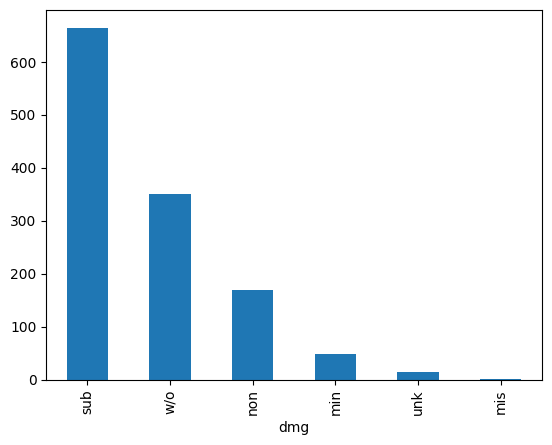

In [8]:
df['dmg'].value_counts().head(10).plot(kind='bar')


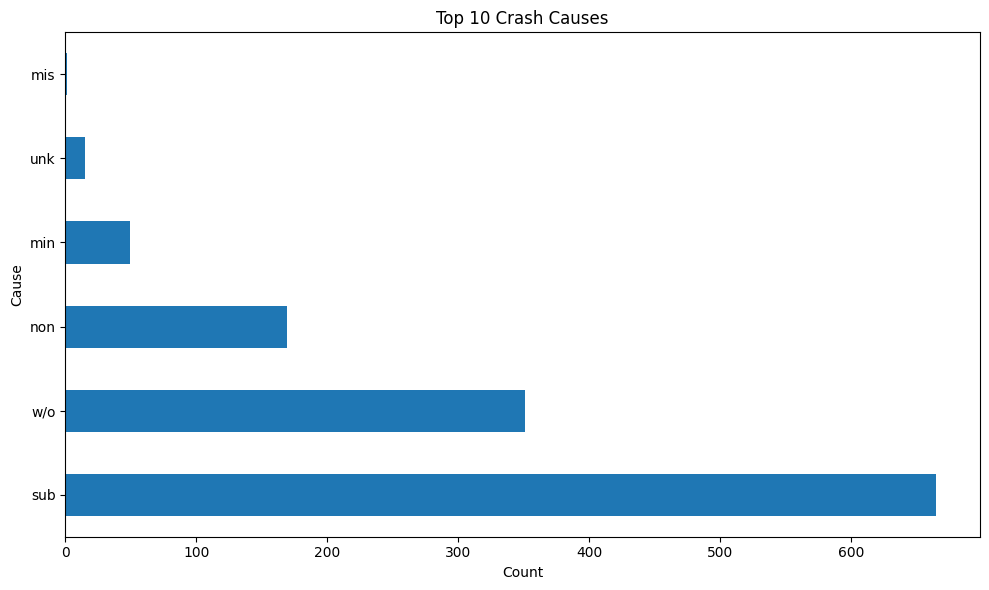

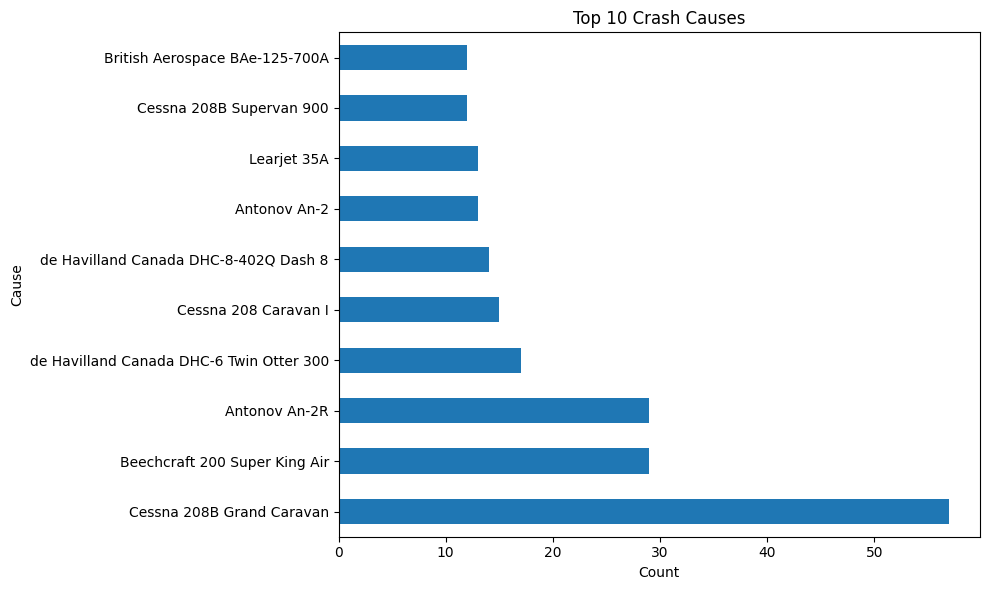

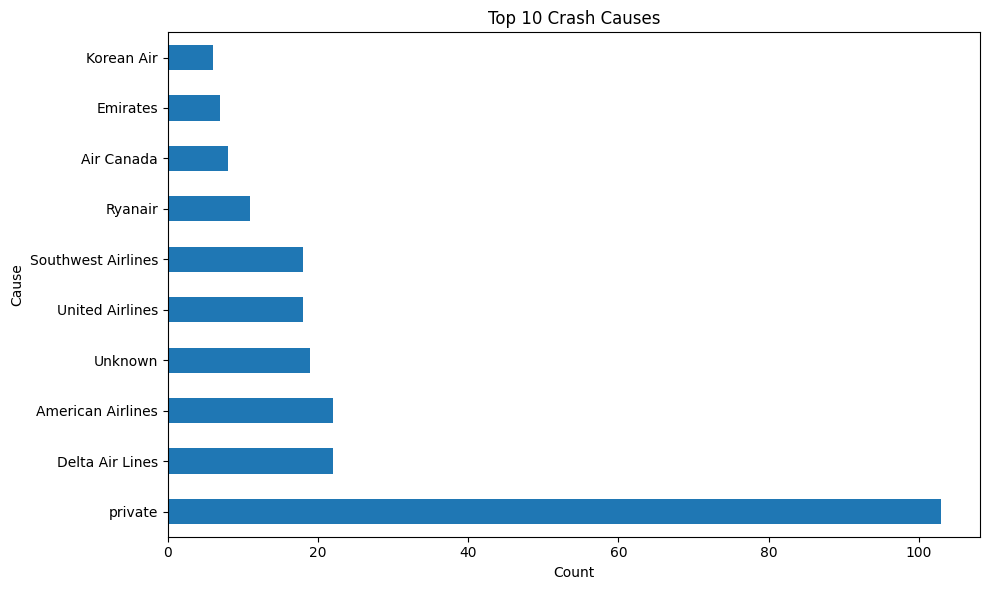

In [9]:
eda.top_crash_causes(cause_column='dmg', top_n=10)
# or maybe 'operator' or 'type' if you want to explore categories
eda.top_crash_causes(cause_column='type', top_n=10)
eda.top_crash_causes(cause_column='operator', top_n=10)


<Axes: title={'center': 'Crashes per Year'}, xlabel='year'>

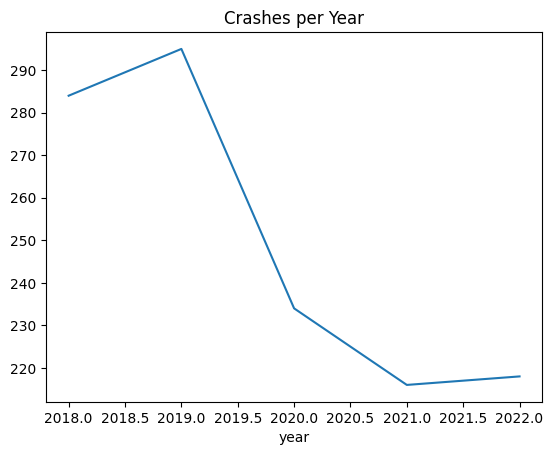

In [ ]:
df['acc.date'] = pd.to_datetime(df['acc.date'])
df['year'] = df['acc.date'].dt.year
df['month'] = df['acc.date'].dt.month
df['year'].value_counts().sort_index().plot(kind='line', title="Crashes per Year")


